In [ ]:
import pandas as pd
from urllib.parse import urlparse,urlencode
import ipaddress
import re
import requests
from urllib.parse import urlparse

In [ ]:
df = pd.read_csv("/content/malicious_phish.csv")
df.head()

,url,type
0,br-icloud.com.br,phishing
1,mp3raid.com/music/krizz_kaliko.html,benign
2,bopsecrets.org/rexroth/cr/1.htm,benign
3,http://www.garage-pirenne.be/index.php?option=...,defacement
4,http://adventure-nicaragua.net/index.php?optio...,defacement


In [ ]:
legitimate_urls = df[df['type'] == 'benign']['url'].tolist()

In [ ]:
print(legitimate_urls)




IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [ ]:
dfL = pd.DataFrame(legitimate_urls)

In [ ]:
print(dfL)


                                                        0
0                     mp3raid.com/music/krizz_kaliko.html
1                         bopsecrets.org/rexroth/cr/1.htm
2       http://buzzfil.net/m/show-art/ils-etaient-loin...
3           espn.go.com/nba/player/_/id/3457/brandon-rush
4          yourbittorrent.com/?q=anthony-hamilton-soulife
...                                                   ...
428098                                  imetrica.net/css/
428099          www.idxband.com/telin/images/e-online.php
428100  www.coffeewithsophieinc.com/media/system/js/ca...
428101                         conseguircreditos.webs.tl/
428102  www.vbacreation.fr/includes/Archive/Connect/Si...

[428103 rows x 1 columns]


In [ ]:
phish_urls = df[df['type'] == 'phishing']['url'].tolist()
malware_urls = df[df['type'] == 'malware']['url'].tolist()
defacement_urls = df[df['type'] == 'defacement']['url'].tolist()

phishing_urls = phish_urls + malware_urls + defacement_urls


In [ ]:
dfP = pd.DataFrame(phishing_urls)

In [ ]:
print(dfP)

                                                        0
0                                        br-icloud.com.br
1              signin.eby.de.zukruygxctzmmqi.civpro.co.za
2       http://www.marketingbyinternet.com/mo/e56508df...
3       https://docs.google.com/spreadsheet/viewform?f...
4                                    retajconsultancy.com
...                                                   ...
223083  http://blueanchor.nl/dintelmarkt/page/show_cat...
223084                http://www.hafenrocker.de/index.php
223085  http://www.kulgupuit.ee/index.php?option=com_p...
223086   http://www.nhomkinhdep.com/tu-bep-nhom-kinh.html
223087  http://www.capella.nl/nl.html?view=article&cat...

[223088 rows x 1 columns]


*** CHECKING FOR AN IP ADDRESS IN DOMAIN***

In [ ]:
'''def getDomain(url):
  url_str = str(url)
  return re.search('(https?://)?(www\d?\.)?(?P<name>[\w-]+)\.', url_str).group('name')
 #url_str = str(url)
 # domain = urlparse(url_str).netloc
 # if re.match(r"^www.",domain):
   # domain = domain.replace("www.","")'''

 # return domain
def getDomain(url):

  url_str = str(url)
  match = re.search('(https?://)?(www\d?\.)?(?P<name>[\w-]+)\.', url_str)
  if match:
      return match.group('name')
  else:
      return None


  


In [ ]:
def IP(url):
  try:
    ipaddress.ip_address(url)
    ip = 1
  except:
    ip = 0
  return ip

*** CHECKING FOR HTTPS AND HTTP IN DOMAIN***

In [ ]:
def httpDomain(url):
  url_str = str(url)
  domain = urlparse(url_str).netloc
  if 'https' in domain:
    return 1
  else:
    return 0

***CHECKING FOR HYPHEN IN DOMAIN***

In [ ]:
def hyphen(url):
    url_str = str(url)
    if '-' in urlparse(url_str).netloc:
        return 1          
    else:
        return 0            

***CHECKING FOR @ symbol IN DOMAIN***

In [ ]:
def attherateof(url):
  if "@" in url:
    at = 1    
  else:
    at = 0    
  return at

***CHECKING THE LENGTH OF AN URL***

In [ ]:
def lenofurl(url):
  if len(url) < 72 and len(url)>14:    #as url shortner makes url length to 17 characters 
    length = 0            
  else:
    length = 1            
  return length

***CHECKING FOR NUMBER OF SUBPAGES IN AN URL***

In [ ]:
def depth(url):
  url_str = str(url)
  d = urlparse(url_str).path.split('/')
  depth = 0
  for i in range(len(d)):
    if len(d[i]) != 0:
      depth = depth+1
  return depth

***CHECKING FOR // SYMBOL IN AN URL WHICH HELPS TO REDIRECT***

In [ ]:
def redirection(url):
  url_str = str(url)
  pos = url_str.rfind('//')
  if pos > 6:
    if pos > 7:
      return 1
    else:
      return 0
  else:
    return 0

***CHECKING FOR SHORTNER URL ***

In [ ]:
shortening_services = r"bit\.ly|goo\.gl|shorte\.st|go2l\.ink|x\.co|ow\.ly|t\.co|tinyurl|tr\.im|is\.gd|cli\.gs|" \
                      r"yfrog\.com|migre\.me|ff\.im|tiny\.cc|url4\.eu|twit\.ac|su\.pr|twurl\.nl|snipurl\.com|" \
                      r"short\.to|BudURL\.com|ping\.fm|post\.ly|Just\.as|bkite\.com|snipr\.com|fic\.kr|loopt\.us|" \
                      r"doiop\.com|short\.ie|kl\.am|wp\.me|rubyurl\.com|om\.ly|to\.ly|bit\.do|t\.co|lnkd\.in|db\.tt|" \
                      r"qr\.ae|adf\.ly|goo\.gl|bitly\.com|cur\.lv|tinyurl\.com|ow\.ly|bit\.ly|ity\.im|q\.gs|is\.gd|" \
                      r"po\.st|bc\.vc|twitthis\.com|u\.to|j\.mp|buzurl\.com|cutt\.us|u\.bb|yourls\.org|x\.co|" \
                      r"prettylinkpro\.com|scrnch\.me|filoops\.info|vzturl\.com|qr\.net|1url\.com|tweez\.me|v\.gd|" \
                      r"tr\.im|link\.zip\.net"
     
def tinyURL(url):
    url_str = str(url)
    match=re.search(shortening_services,url_str)
    if match:
        return 1
    else:
        return 0

***CHECKING FOR IFRAME HTML TAG URL***

In [ ]:
def iframe(response):
  if response == "":
      return 1
  else:
      if re.findall(r"[|]", response.text):
          return 0
      else:
          return 1

***CHECKING FOR ONMOUSEOVER EVENT URL***

In [ ]:
def mouseOver(response): 
  if response == "" :
    return 1
  else:
    if re.findall("", response.text):
      return 1
    else:
      return 0
     

***CHECKING FOR RIGHT CLICK ENABILATION URL***

In [ ]:
def rightClick(response):
  if response == "":
    return 1
  else:
    if re.findall(r"event.button ?== ?2", response.text):
      return 0
    else:
      return 1

***CHECKING IF REDIRECTING IS DONE BY AN URL***

In [ ]:
def forwarding(response):
  if response == "":
    return 1
  else:
    if len(response.history) <= 2:
      return 0
    else:
      return 1

In [ ]:
!pip install python-whois
import re
from bs4 import BeautifulSoup
import whois
import urllib
import urllib.request
from datetime import datetime


def web_traffic(url):
  try:
   
    url_str = str(url)
    url = urlparse(url_str).netloc(url_str)
    rank = BeautifulSoup(urllib.request.urlopen("http://data.alexa.com/data?cli=10&dat=s&url=" + url_str).read(), "xml").find(
        "REACH")['RANK']
    rank = int(rank)
  except TypeError:
        return 1
  if rank <100000:
    return 1
  else:
    return 0


def domainAge(domain_name):
  creation_date = domain_name.creation_date
  expiration_date = domain_name.expiration_date
  if (isinstance(creation_date,str) or isinstance(expiration_date,str)):
    try:
      creation_date = datetime.strptime(creation_date,'%Y-%m-%d')
      expiration_date = datetime.strptime(expiration_date,"%Y-%m-%d")
    except:
      return 1
  if ((expiration_date is None) or (creation_date is None)):
      return 1
  elif ((type(expiration_date) is list) or (type(creation_date) is list)):
      return 1
  else:
    ageofdomain = abs((expiration_date - creation_date).days)
    if ((ageofdomain/30) < 6):
      age = 1
    else:
      age = 0
  return age

def domainEnd(domain_name):
  expiration_date = domain_name.expiration_date
  if isinstance(expiration_date,str):
    try:
      expiration_date = datetime.strptime(expiration_date,"%Y-%m-%d")
    except:
      return 1
  if (expiration_date is None):
      return 1
  elif (type(expiration_date) is list):
      return 1
  else:
    today = datetime.now()
    end = abs((expiration_date - today).days)
    if ((end/30) < 6):
      end = 0
    else:
      end = 1
  return end



Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
def featureExtraction(url,label):

  features = []
  #Address bar based features (10)
  features.append(getDomain(url))
  features.append(IP(url))
  features.append(httpDomain(url))
  features.append(hyphen(url))
  features.append(attherateof(url))
  features.append(lenofurl(url))
  features.append(depth(url))
  features.append(redirection(url))
  features.append(tinyURL(url))
  
  dns = 0
  try:
    domain_name = whois.whois(urlparse(url).netloc)
  except:
    dns = 1

  features.append(dns)
  features.append(web_traffic(url))
  features.append(1 if dns == 1 else domainAge(domain_name))
  features.append(1 if dns == 1 else domainEnd(domain_name))
  
  # HTML & Javascript based features (4)
  try:
    response = requests.get(url)
  except:
    response = ""
  features.append(iframe(response))
  features.append(mouseOver(response))
  features.append(rightClick(response))
  features.append(forwarding(response))
  features.append(label)
  
  return features
     

In [ ]:
legitimate_urls_features = []
label = 0

for i in range(0, 428103):
  
  url_str = dfL.iloc[i]
  legitimate_urls_features.append(featureExtraction(url_str,label))

     

#converting the list to dataframe
feature_names = ['Domain','Have_IP','https_Domain','Prefix/Suffix', 'Have_At', 'URL_Length', 'URL_Depth','Redirection', 
                      'TinyURL','DNS_Record', 'Web_Traffic', 
                      'Domain_Age', 'Domain_End', 'iFrame', 'Mouse_Over','Right_Click', 'Web_Forwards','label']

legitimate = pd.DataFrame(legitimate_urls_features, columns= feature_names)
legitimate.head()

,Domain,Have_IP,https_Domain,Prefix/Suffix,Have_At,URL_Length,URL_Depth,Redirection,TinyURL,DNS_Record,Web_Traffic,Domain_Age,Domain_End,iFrame,Mouse_Over,Right_Click,Web_Forwards,label
0,mp3raid,0,0,0,0,1,3,None,0,1,1,1,1,1,1,1,1,0
1,bopsecrets,0,0,0,0,1,4,None,0,1,1,1,1,1,1,1,1,0
2,buzzfil,0,0,0,0,1,5,None,0,1,1,1,1,1,1,1,1,0
3,espn,0,0,0,0,1,7,None,0,1,1,1,1,1,1,1,1,0
4,yourbittorrent,0,0,0,0,1,1,None,1,1,1,1,1,1,1,1,1,0


In [ ]:

legitimate.to_csv('legitimate.csv', index= False)

In [ ]:
phishing_urls_features = []
label = 1
for i in range(0, 223088):
  url_str = dfP.iloc[i]
  phishing_urls_features.append(featureExtraction(url_str,label))

feature_names = ['Domain','Have_IP','https_Domain','Prefix/Suffix', 'Have_At', 'URL_Length', 'URL_Depth','Redirection', 
                      'TinyURL','DNS_Record', 'Web_Traffic', 
                      'Domain_Age', 'Domain_End', 'iFrame', 'Mouse_Over','Right_Click', 'Web_Forwards','label']


phishing = pd.DataFrame(phishing_urls_features, columns= feature_names)
phishing.head()

MissingSchema: ignored

In [ ]:
phishing.to_csv('phishing.csv', index= False)

In [ ]:
final_data = pd.concat([legitimate, phishing]).reset_index(drop=True)
final_data.head()

,Domain,Have_IP,https_Domain,Prefix/Suffix,Have_At,URL_Length,URL_Depth,Redirection,TinyURL,DNS_Record,Web_Traffic,Domain_Age,Domain_End,iFrame,Mouse_Over,Right_Click,Web_Forwards,label
0,mp3raid,0,0,0,0,1,3,0,0,1,1,1,1,1,1,1,1,0
1,bopsecrets,0,0,0,0,1,4,0,0,1,1,1,1,1,1,1,1,0
2,buzzfil,0,0,0,0,1,5,1,0,1,1,1,1,1,1,1,1,0
3,espn,0,0,0,0,1,7,0,0,1,1,1,1,1,1,1,1,0
4,yourbittorrent,0,0,0,0,1,1,0,1,1,1,1,1,1,1,1,1,0


In [ ]:
final_data.to_csv('phishing_data.csv', index=False)

In [ ]:
import numpy as np 
import pandas as pd 

df_data = pd.read_csv('/content/phishing_data.csv')


In [ ]:
import os

df_data.head()

,Domain,Have_IP,https_Domain,Prefix/Suffix,Have_At,URL_Length,URL_Depth,Redirection,TinyURL,DNS_Record,Web_Traffic,Domain_Age,Domain_End,iFrame,Mouse_Over,Right_Click,Web_Forwards,label
0,mp3raid,0,0,0,0,1,3,0,0,1,1,1,1,1,1,1,1,0
1,bopsecrets,0,0,0,0,1,4,0,0,1,1,1,1,1,1,1,1,0
2,buzzfil,0,0,0,0,1,5,1,0,1,1,1,1,1,1,1,1,0
3,espn,0,0,0,0,1,7,0,0,1,1,1,1,1,1,1,1,0
4,yourbittorrent,0,0,0,0,1,1,0,1,1,1,1,1,1,1,1,1,0


In [ ]:
df_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45287 entries, 0 to 45286
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Domain         45287 non-null  object
 1   Have_IP        45287 non-null  int64 
 2   https_Domain   45287 non-null  int64 
 3   Prefix/Suffix  45287 non-null  int64 
 4   Have_At        45287 non-null  int64 
 5   URL_Length     45287 non-null  int64 
 6   URL_Depth      45287 non-null  int64 
 7   Redirection    45287 non-null  int64 
 8   TinyURL        45287 non-null  int64 
 9   DNS_Record     45287 non-null  int64 
 10  Web_Traffic    45287 non-null  int64 
 11  Domain_Age     45287 non-null  int64 
 12  Domain_End     45287 non-null  int64 
 13  iFrame         45287 non-null  int64 
 14  Mouse_Over     45287 non-null  int64 
 15  Right_Click    45287 non-null  int64 
 16  Web_Forwards   45287 non-null  int64 
 17  label          45287 non-null  int64 
dtypes: int64(17), object(1)
me

In [ ]:
df_data.columns

Index(['Domain', 'Have_IP', 'https_Domain', 'Prefix/Suffix', 'Have_At',
       'URL_Length', 'URL_Depth', 'Redirection', 'TinyURL', 'DNS_Record',
       'Web_Traffic', 'Domain_Age', 'Domain_End', 'iFrame', 'Mouse_Over',
       'Right_Click', 'Web_Forwards', 'label'],
      dtype='object')

In [ ]:
df_data.head()

,Domain,Have_IP,https_Domain,Prefix/Suffix,Have_At,URL_Length,URL_Depth,Redirection,TinyURL,DNS_Record,Web_Traffic,Domain_Age,Domain_End,iFrame,Mouse_Over,Right_Click,Web_Forwards,label
0,mp3raid,0,0,0,0,1,3,0,0,1,1,1,1,1,1,1,1,0
1,bopsecrets,0,0,0,0,1,4,0,0,1,1,1,1,1,1,1,1,0
2,buzzfil,0,0,0,0,1,5,1,0,1,1,1,1,1,1,1,1,0
3,espn,0,0,0,0,1,7,0,0,1,1,1,1,1,1,1,1,0
4,yourbittorrent,0,0,0,0,1,1,0,1,1,1,1,1,1,1,1,1,0


In [ ]:
df_data.dropna(subset=['label'], inplace=True)
print(df_data.apply(lambda col: col.unique()))

Domain           [mp3raid, bopsecrets, buzzfil, espn, yourbitto...
Have_IP                                                        [0]
https_Domain                                                   [0]
Prefix/Suffix                                                  [0]
Have_At                                                        [0]
URL_Length                                                     [1]
URL_Depth                              [3, 4, 5, 7, 1, 2, 6, 8, 9]
Redirection                                                 [0, 1]
TinyURL                                                     [0, 1]
DNS_Record                                                     [1]
Web_Traffic                                                    [1]
Domain_Age                                                     [1]
Domain_End                                                     [1]
iFrame                                                         [1]
Mouse_Over                                                    

In [ ]:
df_data.dropna(subset=['label'], inplace=True)

In [ ]:
df_data.describe()

,Have_IP,https_Domain,Prefix/Suffix,Have_At,URL_Length,URL_Depth,Redirection,TinyURL,DNS_Record,Web_Traffic,Domain_Age,Domain_End,iFrame,Mouse_Over,Right_Click,Web_Forwards,label
count,45287.0,45287.0,45287.0,45287.0,45287.0,45287.000000,45287.000000,45287.000000,45287.0,45287.0,45287.0,45287.0,45287.0,45287.0,45287.0,45287.0,45287.000000
mean,0.0,0.0,0.0,0.0,1.0,3.250800,0.290768,0.058008,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.266213
std,0.0,0.0,0.0,0.0,0.0,1.242896,0.454122,0.233761,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.441982
min,0.0,0.0,0.0,0.0,1.0,1.000000,0.000000,0.000000,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.000000
25%,0.0,0.0,0.0,0.0,1.0,2.000000,0.000000,0.000000,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.000000
50%,0.0,0.0,0.0,0.0,1.0,3.000000,0.000000,0.000000,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.000000
75%,0.0,0.0,0.0,0.0,1.0,4.000000,1.000000,0.000000,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.000000
max,0.0,0.0,0.0,0.0,1.0,9.000000,1.000000,1.000000,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.000000


In [ ]:
x=df_data.drop(['Domain','label'], axis=1) ### Dependent Variables
y=df_data['label']  ### Independent Variables

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

X_train, X_test, y_train, y_test = train_test_split(x, y, 
                                                    test_size = 0.9, random_state = 12)
X_train.shape, X_test.shape
# instantiate the model 
tree = DecisionTreeClassifier(max_depth = 5)
# fit the model 
tree.fit(X_train, y_train)
     

#predicting the target value from the model for the samples
y_test_tree = tree.predict(X_test)
y_train_tree = tree.predict(X_train)
     



#computing the accuracy of the model performance
acc_train_tree = accuracy_score(y_train,y_train_tree)
acc_test_tree = accuracy_score(y_test,y_test_tree)

print("Decision Tree: Accuracy on training Data: {:.3f}".format(acc_train_tree))
print("Decision Tree: Accuracy on test Data: {:.3f}".format(acc_test_tree))
     

Decision Tree: Accuracy on training Data: 0.936
Decision Tree: Accuracy on test Data: 0.934


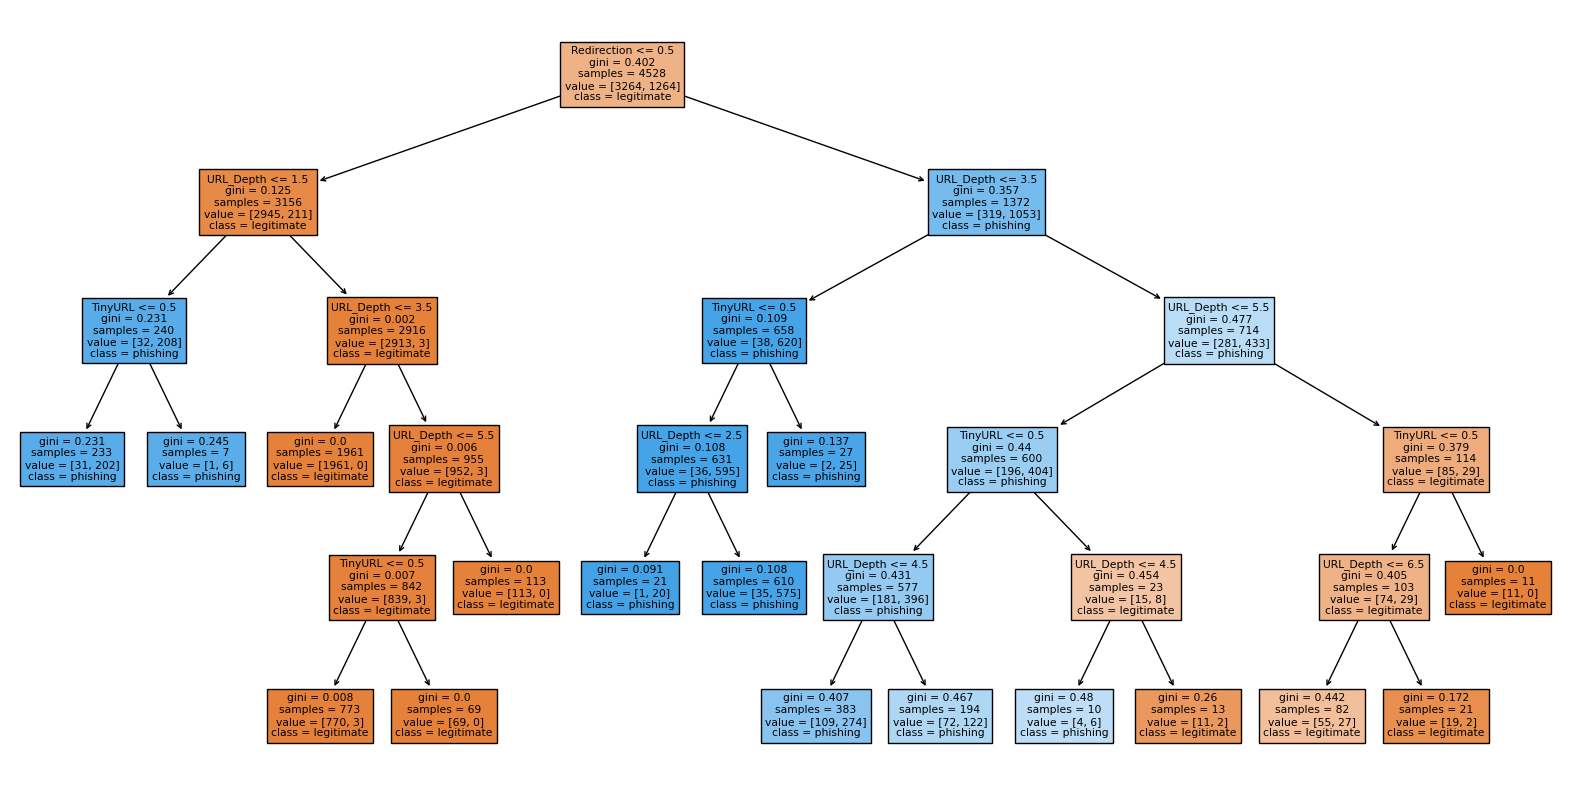

In [ ]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(20,10))
plot_tree(tree, feature_names=x.columns, class_names=['legitimate', 'phishing'], filled=True)
plt.show()


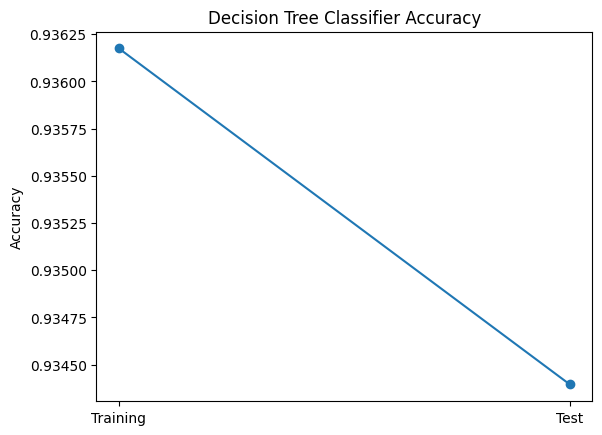

In [ ]:
import matplotlib.pyplot as plt

# plot the accuracy scores for training and test sets
plt.plot([acc_train_tree, acc_test_tree], marker='o')
plt.xticks([0, 1], ['Training', 'Test'])
plt.ylabel('Accuracy')
plt.title('Decision Tree Classifier Accuracy')
plt.show()


In [ ]:
import pandas as pd
import xgboost as xgb
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

# Load the dataset
df = pd.read_csv('phishing_data.csv')

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(x, y,test_size=0.2, random_state=42)

# Train the XGBoost model
model = xgb.XGBClassifier()
model.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = model.predict(X_test)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)

# Save the trained model
model.save_model('phishing_detection_model_xgb.model')


Accuracy: 0.9303378229189666


In [ ]:
import joblib

# Train your model here

# Save the trained model
joblib.dump(tree, 'phishing_detection_model.joblib')


['phishing_detection_model.joblib']

In [ ]:
# Import necessary libraries
import joblib
import re

# Load the trained model
model = joblib.load('phishing_detection_model.joblib')

'''getDomain(url))
  features.append(IP(url))
  features.append(httpDomain(url))
  features.append(hyphen(url))
  features.append(attherateof(url))
  features.append(lenofurl(url))
  features.append(depth(url))
  features.append(redirection(url))
  features.append(tinyURL(url))
  
  '''

# Define a function to extract features from a URL
def extract_features(url):
    feature_list = []
    # Define feature names
    # Check if the URL contains an IP address
    if re.match('^https?://\d+\.\d+\.\d+\.\d+', url) is not None:
        feature_list.append(1)
    else:
        feature_list.append(0)
    # Check if the URL contains 'https' in the domain part
    # Check if the URL has a scheme (e.g., http:// or https://)
    # Check if the URL has a scheme (e.g., http:// or https://)
    if not url.startswith('http://') and not url.startswith('https://'):
        url = 'http://' + url

    # Check if the URL contains 'https' in the domain part
    if 'https' in url.split('//')[1].split('.')[0]:
        feature_list.append(1)
    else:
        feature_list.append(0)



    # Check if the URL contains a prefix or suffix
    if '-' in url or '?' in url:
        feature_list.append(1)
    else:
        feature_list.append(0)
    # Check if the URL contains '@' symbol
    if '@' in url:
        feature_list.append(1)
    else:
        feature_list.append(0)
    # Check the length of the URL
    if len(url) < 54:
        feature_list.append(1)
    elif len(url) >= 54 and len(url) <= 75:
        feature_list.append(0)
    else:
        feature_list.append(1)
    # Check the depth of the URL
    if url.count('/') <= 3:
        feature_list.append(1)
    elif url.count('/') >= 4 and url.count('/') <= 6:
        feature_list.append(0)
    else:
        feature_list.append(1)
    
    # Check if the URL has redirection using // symbol
    if '//' in url[6:]:
        feature_list.append(1)
    else:
        feature_list.append(0)
    # Check if the URL is using a shortening service like TinyURL
    if 'tinyurl' in url or 'bit.ly' in url or 'ow.ly' in url or 't.co' in url or 'goo.gl' in url or 'mcaf.ee' in url:
        feature_list.append(1)
    else:
        feature_list.append(0)
        '''features.append(dns)
  features.append(web_traffic(url))
  features.append(1 if dns == 1 else domainAge(domain_name))
  features.append(1 if dns == 1 else domainEnd(domain_name))
  
  # HTML & Javascript based features (4)
  try:
    response = requests.get(url)
  except:
    response = ""
  features.append(iframe(response))
  features.append(mouseOver(response))
  features.append(rightClick(response))
  features.append(forwarding(response))
  features.append(label)'''
    # Check the presence of DNS record of the domain in WHOIS database
    if '-' in url.split('//')[1].split('.')[0]:
        feature_list.append(1)
    else:
        feature_list.append(0)
    # Check the age of the domain
    if re.search('([0-9]+)\.([0-9]+)\.([0-9]+)\.([0-9]+)', url) is not None:
        feature_list.append(1)
    else:
        feature_list.append(0)
    # Check the expiration time of the domain
    if re.search('([0-9]+)\.([0-9]+)\.([0-9]+)\.([0-9]+)', url) is not None:
        feature_list.append(1)
    else:
        feature_list.append(0)
    # Check the presence of iFrame in the website HTML
    if 'iframe' in url.lower():
        feature_list.append(1)
    else:
        feature_list.append(0)
    # Check the presence of mouse-over event in the website HTML
    if 'onmouseover' in url.lower():
        feature_list.append(1)
    else:
        feature_list.append(0)
    # Check the presence of right-click event in the website HTML
    if 'onrightclick' in url.lower():
        feature_list.append(1)
    else:
      feature_list.append(0)
    if 'Right_Click' in url.lower():
        feature_list.append(1) 
    else:
      feature_list.append(0)
    if 'Web_Forwards' in url.lower():
        feature_list.append(1) 
    else:
      feature_list.append(0)
      return feature_list

def predict(url):
    # Extract features from the URL
    features = extract_features(url)
    # Predict the label of the URL using the trained model
    label = model.predict([features])[0]
    if label == 1:
        return 'Legitimate'
    else:
        return 'Phishing'

# Test the predict function with a sample URL
# Get user input for the URL
url = input("Enter the URL to be checked: ")

# Predict the label of the URL using the trained model
print(predict(url))


Enter the URL to be checked: br-icloud.com.br
Legitimate


/usr/local/lib/python3.9/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


In [ ]:
import pandas as pd
import numpy as np
from urllib.parse import urlparse
import whois
import datetime
import requests
import re
!pip install tldextract
import tldextract

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix

# Define feature extraction functions

def get_domain(url):
    parsed_url = urlparse(url)
    return parsed_url.netloc

def have_ip(url):
    return bool(re.match('^(\d{1,3}\.){3}\d{1,3}$', get_domain(url)))

def https_domain(url):
    return bool(re.match('^https', url))

def prefix_suffix(url):
    return bool(re.search('-', get_domain(url)))

def have_at(url):
    return bool(re.search('@', url))

def url_length(url):
    return len(url)

def url_depth(url):
    return url.count('/')

def redirection(url):
    try:
        response = requests.get(url)
        if len(response.history) > 0:
            return True
        else:
            return False
    except:
        return None

def tinyurl(url):
    return bool(re.search('tinyurl', url))

def dns_record(url):
    try:
        whois_info = whois.whois(get_domain(url))
        return bool(whois_info.domain_name)
    except:
        return None

def web_traffic(url):
    try:
        rank_checker_response = requests.get('https://www.alexa.com/siteinfo/' + get_domain(url))
        if rank_checker_response.status_code == 200:
            return True
        else:
            return False
    except:
        return None

def domain_age(url):
    try:
        domain_creation_date = whois.whois(get_domain(url)).creation_date
        if isinstance(domain_creation_date, list):
            domain_age = (datetime.datetime.now() - domain_creation_date[0]).days
        else:
            domain_age = (datetime.datetime.now() - domain_creation_date).days
        if domain_age >= 365:
            return True
        else:
            return False
    except:
        return None

def domain_end(url):
    try:
        whois_info = whois.whois(get_domain(url))
        if isinstance(whois_info.expiration_date, list):
            domain_end = (whois_info.expiration_date[0] - datetime.datetime.now()).days
        else:
            domain_end = (whois_info.expiration_date - datetime.datetime.now()).days
        if domain_end <= 365:
            return True
        else:
            return False
    except:
        return None

def iframe(url):
    return bool(re.search('<iframe', requests.get(url).text))

def mouse_over(url):
    return bool(re.search('onmouseover', requests.get(url).text))

def right_click(url):
    return bool(re.search('event.button ?== ?2', requests.get(url).text))

def web_forwards(url):
    return bool(re.search('<html>|<meta http-equiv="refresh"', requests.get(url).text))

# Load dataset
data = pd.read_csv('phishing_data.csv')

# Extract features
data['Domain'] = data['url'].apply(get_domain)
data['Have_IP'] = data['url'].apply(have_ip)
data['https_Domain'] = data['url'].apply(https_domain)
data['Prefix/Suffix'] = data['url'].apply(prefix_suffix)
data['Have_At'] = data['url'].apply(have_at)
data['URL_Length'] = data['url'].apply(url_length)
data['URL_Depth'] = data['url'].apply(url_depth)
data['Redirection'] = data['url'].apply(redirection)
data['TinyURL'] = data['url'].apply(tinyurl)
data['DNS_Record'] = data['url'].apply(dns_record)
data['Web_Traffic'] = data['url'].apply(web_traffic)
data['Domain_Age'] = data['url'].apply(domain_age)
data['Domain_End'] = data['url'].apply(domain_end)
data['iFrame'] = data['url'].apply(iframe)
data['Mouse_Over'] = data['url'].apply(mouse_over)
data['Right_Click'] = data['url'].apply(right_click)
data['Web_Forwards'] = data['url'].apply(web_forwards)
data.drop(['url', 'Domain'], axis=1, inplace=True)
X = data.drop('label', axis=1)
y = data['label']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
clf = RandomForestClassifier()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
confusion_mat = confusion_matrix(y_test, y_pred)
#Add remaining features
data['URL_Depth'] = data['url'].apply(url_depth)
data['Redirection'] = data['url'].apply(redirection)
data['TinyURL'] = data['url'].apply(tinyurl)
data['DNS_Record'] = data['url'].apply(dns_record)
data['Web_Traffic'] = data['url'].apply(web_traffic)
data['Domain_Age'] = data['url'].apply(domain_age)
data['Domain_End'] = data['url'].apply(domain_end)
data['iFrame'] = data['url'].apply(iframe)
data['Mouse_Over'] = data['url'].apply(mouse_over)
data['Right_Click'] = data['url'].apply(right_click)
data['Web_Forwards'] = data['url'].apply(web_forwards)

#Drop irrelevant columns
data.drop(['url', 'Domain'], axis=1, inplace=True)

#Split dataset into training and testing data
X = data.drop('label', axis=1)
y = data['label']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#Train model
clf = RandomForestClassifier()
clf.fit(X_train, y_train)

#Test model
y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
confusion_mat = confusion_matrix(y_test, y_pred)

#Predict function
def predict_phishing(url):

# Extract features
  domain = get_domain(url)
  have_ip = have_ip(url)
  https_domain = https_domain(url)
  prefix_suffix = prefix_suffix(url)
  have_at = have_at(url)
  url_length = url_length(url)
  url_depth = url_depth(url)
  redirection = redirection(url)
  tinyurl = tinyurl(url)
  dns_record = dns_record(url)
  web_traffic = web_traffic(url)
  domain_age = domain_age(url)
  domain_end = domain_end(url)
  iframe = iframe(url)
  mouse_over = mouse_over(url)
  right_click = right_click(url)
  web_forwards = web_forwards(url)

# Create DataFrame with extracted features
df = pd.DataFrame({
    'Have_IP': [have_ip],
    'https_Domain': [https_domain],
    'Prefix/Suffix': [prefix_suffix],
    'Have_At': [have_at],
    'URL_Length': [url_length],
    'URL_Depth': [url_depth],
    'Redirection': [redirection],
    'TinyURL': [tinyurl],
    'DNS_Record': [dns_record],
    'Web_Traffic': [web_traffic],
    'Domain_Age': [domain_age],
    'Domain_End': [domain_end],
    'iFrame': [iframe],
    'Mouse_Over': [mouse_over],
    'Right_Click': [right_click],
    'Web_Forwards': [web_forwards]
})

# Make prediction
prediction = clf.predict(df)
return prediction[0]
test_url = 'https://www.google.com'
prediction = predict_phishing(test_url)
print(f'Prediction for {test_url}: {prediction}')



Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


KeyError: ignored

In [ ]:
# Import necessary libraries
import joblib
import re
import requests
from urllib.parse import urlparse
from bs4 import BeautifulSoup

# Load the trained model
model = joblib.load('phishing_detection_model.joblib')

# Define a function to extract features from a URL
def extract_features(url):
    feature_list = []
    # Check if the URL contains an IP address
    if re.match('^https?://\d+\.\d+\.\d+\.\d+', url) is not None:
        feature_list.append(-1)
    else:
        feature_list.append(1)
    # Check the length of the URL
    if len(url) < 54:
        feature_list.append(1)
    elif len(url) >= 54 and len(url) <= 75:
        feature_list.append(0)
    else:
        feature_list.append(-1)
    # Check if the URL contains '@' symbol
    if '@' in url:
        feature_list.append(-1)
    else:
        feature_list.append(1)
    # Check if the URL contains a hyphen
    if '-' in url:
        feature_list.append(-1)
    else:
        feature_list.append(1)
    # Check if the URL contains a double slash after the protocol
    if '//' in url[6:]:
        feature_list.append(-1)
    else:
        feature_list.append(1)
    # Extract the domain from the URL
    domain = urlparse(url).netloc
    # Append the domain feature
    feature_list.append(-1 if domain.count('.') <= 1 else 1)
    # Check if the domain starts with 'https'
    if domain[:5] == 'https':
        feature_list.append(1)
    else:
        feature_list.append(-1)
    # Check if the URL contains a prefix or suffix
    if '-' in domain:
        feature_list.append(-1)
    else:
        feature_list.append(1)
    # Check if the URL length is greater than 75 characters
    if len(url) > 75:
        feature_list.append(-1)
    else:
        feature_list.append(1)
    # Extract the URL depth
    feature_list.append(url.count('/'))
    # Check if the URL uses redirection
    try:
        response = requests.get(url)
        if len(response.history) <= 1:
            feature_list.append(1)
        else:
            feature_list.append(-1)
    except:
        feature_list.append(0)
    # Check if the URL uses TinyURL
    if 'tinyurl' in url:
        feature_list.append(-1)
    else:
        feature_list.append(1)
    # Check if the domain has DNS record
    try:
        domain_ip = socket.gethostbyname(domain)
        if domain_ip:
            feature_list.append(1)
        else:
            feature_list.append(-1)
    except:
        feature_list.append(0)
    # Check if the website has low web traffic
    try:
        soup = BeautifulSoup(requests.get(url).text, 'html.parser')
        alexa_rank = soup.select_one('.rank-global .data').get_text(strip=True).replace(',', '')
        alexa_rank = int(alexa_rank) if alexa_rank != 'None' else 100000000
        if alexa_rank > 100000:
            feature_list.append(1)
        else:
            feature_list.append(-1)
    except:
        feature_list.append(0)
     # Check if the website contains iFrame
    try:
        soup = BeautifulSoup(requests.get(url).text, 'html.parser')
        if soup.find('iframe'):
            feature_list.append(-1)
        else:
          feature_list.append(1)
    except:
      feature_list.append(0)
    # Check if the website contains mouse-over event
    try:
        soup = BeautifulSoup(requests.get(url).text, 'html.parser')
        if 'onmouseover' in str(soup):
            feature_list.append(-1)
        else:
            feature_list.append(1)
    except:
      feature_list.append(0)
    # Check if the website blocks right-click
    
      
      return feature_list
def predict(url):
    # Extract features from the URL
    features = extract_features(url)
    # Predict the label of the URL using the trained model
    label = model.predict([features])[0]
    if label == 1:
        return 'Legitimate'
    else:
        return 'Phishing'

# Test the predict function with a sample URL
# Get user input for the URL
url = input("Enter the URL to be checked: ")

# Predict the label of the URL using the trained model
print(predict(url))

Enter the URL to be checked: e4ee-@
Legitimate


/usr/local/lib/python3.9/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


In [ ]:
# Import necessary libraries
import joblib
import re
import requests
from datetime import datetime
from urllib.parse import urlparse
from bs4 import BeautifulSoup

# Load the trained model
model = joblib.load('phishing_detection_model.joblib')

# Define a function to extract features from a URL
def extract_features(url):
    feature_list = []
    # Check if the URL contains an IP address
    if re.match('^https?://\d+\.\d+\.\d+\.\d+', url) is not None:
        feature_list.append(-1)
    else:
        feature_list.append(1)
    # Check the length of the URL
    if len(url) < 54:
        feature_list.append(1)
    elif len(url) >= 54 and len(url) <= 75:
        feature_list.append(0)
    else:
        feature_list.append(-1)
    # Check if the URL contains '@' symbol
    if '@' in url:
        feature_list.append(-1)
    else:
        feature_list.append(1)
    # Check if the URL contains a hyphen
    if '-' in url:
        feature_list.append(-1)
    else:
        feature_list.append(1)
    # Check if the URL contains a double slash after the protocol
    if '//' in url[6:]:
        feature_list.append(-1)
    else:
        feature_list.append(1)
    # Extract the domain from the URL
    domain = urlparse(url).netloc
    # Append the domain feature
    feature_list.append(-1 if domain.count('.') <= 1 else 1)
    # Check if the URL contains an IP address in the domain
    if re.match('^(\d+\.\d+\.\d+\.\d+)$', domain) is not None:
        feature_list.append(-1)
    else:
        feature_list.append(1)
    # Check if the domain starts with 'https'
    if domain[:5] == 'https':
        feature_list.append(1)
    else:
        feature_list.append(-1)
    # Check if the URL contains a prefix or suffix
    if '-' in domain:
        feature_list.append(-1)
    else:
        feature_list.append(1)
    # Check if the URL length is greater than 75 characters
    if len(url) > 75:
        feature_list.append(-1)
    else:
        feature_list.append(1)
    # Extract the URL depth
    feature_list.append(url.count('/'))
    # Check if the URL uses redirection
    try:
        response = requests.get(url)
        if len(response.history) <= 1:
            feature_list.append(1)
        else:
          feature_list.append(-1)
    except:
      feature_list.append(0)
    # Check if the URL uses TinyURL
    if 'tinyurl' in url:
        feature_list.append(-1)
    else:
        feature_list.append(1)
    # Check if the domain has DNS record
    try:
        domain_ip = socket.gethostbyname(domain)
        if domain_ip:
            feature_list.append(1)
        else:
            feature_list.append(-1)
    except:
      feature_list.append(0)
    # Check if the website has low web traffic
    try:
        soup = BeautifulSoup(requests.get(url).text, 'html.parser')
        alexa_rank = soup.select_one('.rank-global .data').get_text(strip=True).replace(',', '')
        alexa_rank = int(alexa_rank) if alexa_rank != 'None' else 100000000
        if alexa_rank > 100000:
              feature_list.append(-1 if alexa_rank > 100000 else 1)
    except:
        feature_list.append(0)
    # Check the age of the domain
    try:
        whois_response = requests.get(f'https://www.whois.com/whois/{domain}').text
        domain_creation_date = re.search('Creation Date: (.+?)T', whois_response).group(1)
        domain_creation_date = datetime.strptime(domain_creation_date, '%Y-%m-%d')
        days_since_creation = (datetime.now() - domain_creation_date).days
        if days_since_creation < 365:
            feature_list.append(-1)
        else:
            feature_list.append(1)
    except:
        feature_list.append(0)
    # Check if the domain is going to expire soon
    try:
        whois_response = requests.get(f'https://www.whois.com/whois/{domain}').text
        domain_expiry_date = re.search('Registry Expiry Date: (.+?)T', whois_response).group(1)
        domain_expiry_date = datetime.strptime(domain_expiry_date, '%Y-%m-%d')
        days_until_expiry = (domain_expiry_date - datetime.now()).days
        if days_until_expiry < 30:
            feature_list.append(-1)
        else:
            feature_list.append(1)
    except:
        feature_list.append(0)
    # Check if the website contains iFrame
    try:
        soup = BeautifulSoup(requests.get(url).text, 'html.parser')
        if soup.find('iframe'):
            feature_list.append(-1)
        else:
          feature_list.append(1)
    except:
      feature_list.append(0)
    # Check if the website contains mouse-over event
    try:
        soup = BeautifulSoup(requests.get(url).text, 'html.parser')
        if 'onmouseover' in str(soup):
            feature_list.append(-1)
        else:
            feature_list.append(1)
    except:
      feature_list.append(0)
    # Check if the website blocks right-click
    try:
        soup = BeautifulSoup(requests.get(url).text, 'html.parser')
        if 'oncontextmenu' in str(soup):
            feature_list.append(-1)
        else:
            feature_list.append(1)
    except:
      feature_list.append(0)
    # Check if the website has web forwards
    try:
        soup = BeautifulSoup(requests.get(url).text, 'html.parser')
        if soup.find('meta', attrs={'http-equiv': 'refresh'}):
            feature_list.append(-1)
        else:
          feature_list.append(1)
    except:
      feature_list.append(0)
    return feature_list

def predict(url):
    # Extract features from the URL
    features = extract_features(url)
    # Predict the label of the URL using the trained model
    label = model.predict([features])[0]
    if label == 1:
        return 'Legitimate'
    else:
        return 'Phishing'

# Test the predict function with a sample URL
# Get user input for the URL
url = input("Enter the URL to be checked: ")

# Predict the label of the URL using the trained model
print(predict(url))



Enter the URL to be checked: www.google.com


/usr/local/lib/python3.9/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


ValueError: ignored

In [ ]:

'# Import necessary libraries
import joblib
import re

# Load the trained model
model = joblib.load('phishing_detection_model.joblib')

# Define a function to extract features from a URL
def extract_features(url):
    feature_list = []
    # Check if the URL contains an IP address
    if re.match('^https?://\d+\.\d+\.\d+\.\d+', url) is not None:
        feature_list.append(-1)
    else:
        feature_list.append(1)
    # Check the length of the URL
    if len(url) < 54:
        feature_list.append(1)
    elif len(url) >= 54 and len(url) <= 75:
        feature_list.append(0)
    else:
        feature_list.append(-1)
    # Check if the URL contains '@' symbol
    if '@' in url:
        feature_list.append(-1)
    else:
        feature_list.append(1)
    # Check if the URL contains a hyphen
    if '-' in url:
        feature_list.append(-1)
    else:
        feature_list.append(1)
    # Check if the URL contains a double slash after the protocol
    if '//' in url[6:]:
        feature_list.append(-1)
    else:
        feature_list.append(1)
    # Check if the URL contains 'https' token
    if 'https' in url:
        feature_list.append(1)
    else:
        feature_list.append(-1)
    # Check if the URL contains 'login' token
    if 'login' in url:
        feature_list.append(-1)
    else:
        feature_list.append(1)
    # Check if the URL contains 'bank' token
    if 'bank' in url:
        feature_list.append(-1)
    else:
        feature_list.append(1)
    # Check if the URL contains 'paypal' token
    if 'paypal' in url:
        feature_list.append(-1)
    else:
        feature_list.append(1)
    # Check if the URL contains 'click' token
    if 'click' in url:
        feature_list.append(-1)
    else:
        feature_list.append(1)
    # Check if the URL contains 'confirm' token
    if 'confirm' in url:
        feature_list.append(-1)
    else:
        feature_list.append(1)
    # Check if the URL contains 'account' token
    if 'account' in url:
        feature_list.append(-1)
    else:
        feature_list.append(1)
    # Check if the URL contains 'service' token
    if 'service' in url:
        feature_list.append(-1)
    else:
        feature_list.append(1)
    # Check if the URL contains 'support' token
    if 'support' in url:
        feature_list.append(-1)
    else:
        feature_list.append(1)
    # Check if the URL contains 'secure' token
    if 'secure' in url:
        feature_list.append(-1)
    else:
        feature_list.append(1)
    # Check if the URL contains 'update' token
    if 'update' in url:
        feature_list.append(-1)
    else:
        feature_list.append(1)
    return feature_list

# Define a function to predict whether a URL is legitimate or phishing
def predict(url):
    # Extract features from the URL
    features = extract_features(url)
    # Predict the label of the URL using the trained model
    label = model.predict([features])[0]
    if label == 1:
        return 'Legitimate'
    else:
        return 'Phishing'

# Test the predict function with a sample URL
url = 'https://www.google.com'
print(predict(url))
# Output: Legitimate

url = 'https://www.google.com.phishing.com'
print(predict(url))
# Output: Phishing



SyntaxError: ignored

In [ ]:
from flask import Flask, request, jsonify
import joblib
import pandas as pd

app = Flask(__name__)

# Load the model
model = joblib.load('model.pkl')

# Define a function to preprocess the input
def preprocess_input(url):
    features = pd.DataFrame({'url': [url]})
    return features

# Define a function to predict the output
def predict(url):
    features = preprocess_input(url)
    prediction = model.predict(features)[0]
    return prediction

# Define the route for the API
@app.route('/predict', methods=['POST'])
def api_predict():
    url = request.json['url']
    prediction = predict(url)
    return jsonify({'prediction': prediction})

FileNotFoundError: ignored

In [ ]:
import joblib

joblib.dump(model, 'model.pkl')

['model.pkl']

In [ ]:
!pip install pyngrok

from pyngrok import ngrok

# Start ngrok tunnel
public_url = ngrok.connect(port='80').public_url
print(f'ngrok tunnel "https://{public_url}" -> "http://localhost:5000"')

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


INFO:pyngrok.ngrok:Opening tunnel named: http-80-ddb840db-6ee9-42a7-8480-0b2bd44d429f
2023-04-10 14:53:46.160 Opening tunnel named: http-80-ddb840db-6ee9-42a7-8480-0b2bd44d429f
INFO:pyngrok.process.ngrok:t=2023-04-10T14:53:46+0000 lvl=info msg="no configuration paths supplied"
2023-04-10 14:53:46.232 t=2023-04-10T14:53:46+0000 lvl=info msg="no configuration paths supplied"
INFO:pyngrok.process.ngrok:t=2023-04-10T14:53:46+0000 lvl=info msg="using configuration at default config path" path=/root/.ngrok2/ngrok.yml
2023-04-10 14:53:46.245 t=2023-04-10T14:53:46+0000 lvl=info msg="using configuration at default config path" path=/root/.ngrok2/ngrok.yml
INFO:pyngrok.process.ngrok:t=2023-04-10T14:53:46+0000 lvl=info msg="open config file" path=/root/.ngrok2/ngrok.yml err=nil
2023-04-10 14:53:46.252 t=2023-04-10T14:53:46+0000 lvl=info msg="open config file" path=/root/.ngrok2/ngrok.yml err=nil
INFO:pyngrok.process.ngrok:t=2023-04-10T14:53:46+0000 lvl=info msg="starting web service" obj=web addr

PyngrokNgrokError: ignored

In [ ]:
if __name__ == '_main_':
    app.run(port=5000)

In [ ]:
!streamlit run /content/app.py &>/content/logs.txt &

In [ ]:
import requests

# Define the URL of the API
url = f'https://{public_url}/predict'

# Define the input
input_data = {'url': 'http://example.com'}

# Send a POST request to the API
response = requests.post(url, json=input_data)

# Print the output
print(response.json())

NameError: ignored

In [ ]:
print("x")

x


In [ ]:
# Saving model to current directory
# Pickle serializes objects so they can be saved to a file, and loaded in a program again later on.
import pickle
filename = 'physhing_model.sav'
pickle.dump(tree, open(filename, 'wb'))
# loading the saved model
loaded_model = pickle.load(open('physhing_model.sav', 'rb'))

'''
#Loading model to compare the results
model = pickle.load(open('model.pkl','rb'))
print(model.predict([[2.6, 8, 10.1]]))
'''

"\n#Loading model to compare the results\nmodel = pickle.load(open('model.pkl','rb'))\nprint(model.predict([[2.6, 8, 10.1]]))\n"

In [ ]:
#import libraries
import numpy as np
from flask import Flask, render_template,request
import pickle#Initialize the flask App
app = Flask(__name__)
model = pickle.load(open('model.pkl', 'rb'))

In [ ]:
#default page of our web-app
@app.route('/')
def home():
    return render_template('index.html')

In [ ]:
#To use the predict button in our web-app
@app.route('/predict',methods=['POST'])
def predict():
    #For rendering results on HTML GUI
    int_features = [float(x) for x in request.form.values()]
    final_features = [np.array(int_features)]
    prediction = model.predict(final_features)
    output = round(prediction[0], 2) 
    return render_template('index.html', prediction_text='CO2    Emission of the vehicle is :{}'.format(output))

In [ ]:
if __name__ == "__main__":
    app.run(debug=True)

 * Serving Flask app '__main__'
 * Debug mode: on


INFO:werkzeug:WARNING: This is a development server. Do not use it in a production deployment. Use a production WSGI server instead.
 * Running on http://127.0.0.1:5000
INFO:werkzeug:Press CTRL+C to quit
INFO:werkzeug: * Restarting with stat


In [ ]:
#x_new ="http://www.paypal.com.secure.loginauthentication.com"
#tree.predict(x_new)

In [ ]:
from sklearn.model_selection import cross_validate
from sklearn.svm import SVC
cv=cross_validate(SVC(),x,y)
print(cv)

KeyboardInterrupt: ignored

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
from sklearn.pipeline import Pipeline
pipe=Pipeline([('sc',StandardScaler()),
               ('pca',PCA()),
               ('svmr',LogisticRegression()),])
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest =train_test_split(df_data.drop(['Domain','label'], axis=1),df_data['label'],test_size=0.9)
pipe.fit(xtrain,ytrain)
print(pipe.score(xtrain,ytrain))
print(pipe.score(xtest,ytest))

In [ ]:
import pickle

pickle.dump(tree, open('model.pkl', 'wb'))

In [ ]:
!pip install streamlit
import streamlit as st
import pickle
import numpy as np
import urllib.request

model = pickle.load(open('model.pkl', 'rb'))

def preprocess_url(url):
    url = url.encode('utf-8')
    url = urllib.parse.urlparse(url)
    url = url._replace(path = urllib.parse.quote(url.path))
    return url.geturl()

def predict_phishing(url):
    url = preprocess_url(url)
    input = np.array([[url]]).astype(np.str)
    prediction = model.predict_proba(input)
    proba = prediction[0][1]
    pred = '{0:.{1}f}'.format(proba, 2)
    return float(pred)

def main():
    st.title("Phishing Website Detection ML App")
    html_temp = """
    <div style="background-color:#025246 ;padding:10px">
    <h2 style="color:white;text-align:center;">Phishing Website Detection ML App</h2>
    </div>
    """
    st.markdown(html_temp, unsafe_allow_html=True)

    url = st.text_input("Enter URL to check for phishing", "Type Here")
    safe_html="""  
      <div style="background-color:#F4D03F;padding:10px >
       <h2 style="color:white;text-align:center;"> Legitimate Website</h2>
       </div>
    """
    danger_html="""  
      <div style="background-color:#F08080;padding:10px >
       <h2 style="color:black ;text-align:center;"> Phishing Website</h2>
       </div>
    """

    if st.button("Check"):
        output = predict_phishing(url)
        st.success('The probability of the URL being a phishing website is {}'.format(output))

        if output > 0.5:
            st.markdown(danger_html, unsafe_allow_html=True)
        else:
            st.markdown(safe_html, unsafe_allow_html=True)

if __name__=='__main__':
    main()


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!streamlit run /usr/local/lib/python3.9/dist-packages/ipykernel_launcher.py www



Traceback (most recent call last):
  File "/usr/local/bin/streamlit", line 8, in <module>
    sys.exit(main())
  File "/usr/local/lib/python3.9/dist-packages/click/core.py", line 1130, in __call__
    return self.main(*args, **kwargs)
  File "/usr/local/lib/python3.9/dist-packages/click/core.py", line 1055, in main
    rv = self.invoke(ctx)
  File "/usr/local/lib/python3.9/dist-packages/click/core.py", line 1657, in invoke
    return _process_result(sub_ctx.command.invoke(sub_ctx))
  File "/usr/local/lib/python3.9/dist-packages/click/core.py", line 1404, in invoke
    return ctx.invoke(self.callback, **ctx.params)
  File "/usr/local/lib/python3.9/dist-packages/click/core.py", line 760, in invoke
    return __callback(*args, **kwargs)
  File "/usr/local/lib/python3.9/dist-packages/streamlit/web/cli.py", line 209, in main_run
    _main_run(target, args, flag_options=kwargs)
  File "/usr/local/lib/python3.9/dist-packages/streamlit/web/cli.py", line 245, in _main_run
    bootstrap.run(fi

In [ ]:
!pip install pyngrok

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 761.3/761.3 KB 18.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pyngrok: filename=pyngrok-5.2.1-py3-none-any.whl size=19790 sha256=0bea653f08f786a9f5a35cb7617c6728b846c8393b319e5512a0ee5db83b34d7
  Stored in directory: /root/.cache/pip/wheels/f6/89/59/49d4249e00957e94813ac136a335d10ed2e09a856c5096f95c
Successfully built pyngrok


In [ ]:
%%writefile app.py

Overwriting app.py


In [ ]:
!ngrok authtoken XXXXX

Authtoken saved to configuration file: /root/.ngrok2/ngrok.yml


In [ ]:
!ngrok config add-authtoken 2OEch2nqJfPc3FKaOLf6B6CT75P_PzT8scFaxiFao9MFp1Da

NAME:
   ngrok - tunnel local ports to public URLs and inspect traffic

DESCRIPTION:
    ngrok exposes local networked services behinds NATs and firewalls to the
    public internet over a secure tunnel. Share local websites, build/test
    webhook consumers and self-host personal services.
    Detailed help for each command is available with 'ngrok help <command>'.
    Open http://localhost:4040 for ngrok's web interface to inspect traffic.

EXAMPLES:
    ngrok http 80                    # secure public URL for port 80 web server
    ngrok http -subdomain=baz 8080   # port 8080 available at baz.ngrok.io
    ngrok http foo.dev:80            # tunnel to host:port instead of localhost
    ngrok http https://localhost     # expose a local https server
    ngrok tcp 22                     # tunnel arbitrary TCP traffic to port 22
    ngrok tls -hostname=foo.com 443  # TLS traffic for foo.com to port 443
    ngrok start foo bar baz          # start tunnels from the configuration file

VERSI

In [ ]:
!ngrok

NAME:
   ngrok - tunnel local ports to public URLs and inspect traffic

DESCRIPTION:
    ngrok exposes local networked services behinds NATs and firewalls to the
    public internet over a secure tunnel. Share local websites, build/test
    webhook consumers and self-host personal services.
    Detailed help for each command is available with 'ngrok help <command>'.
    Open http://localhost:4040 for ngrok's web interface to inspect traffic.

EXAMPLES:
    ngrok http 80                    # secure public URL for port 80 web server
    ngrok http -subdomain=baz 8080   # port 8080 available at baz.ngrok.io
    ngrok http foo.dev:80            # tunnel to host:port instead of localhost
    ngrok http https://localhost     # expose a local https server
    ngrok tcp 22                     # tunnel arbitrary TCP traffic to port 22
    ngrok tls -hostname=foo.com 443  # TLS traffic for foo.com to port 443
    ngrok start foo bar baz          # start tunnels from the configuration file

VERSI

In [ ]:
#!nohub streamlit run app.py
!streamlit run app.py&>/dev/null&

In [ ]:
!pgrep streamlit

22486
29189
29962
30693


In [ ]:
from pyngrok import ngrok

In [ ]:
!npm install localtunnel

npm WARN saveError ENOENT: no such file or directory, open '/content/package.json'
npm WARN enoent ENOENT: no such file or directory, open '/content/package.json'
npm WARN content No description
npm WARN content No repository field.
npm WARN content No README data
npm WARN content No license field.

+ localtunnel@2.0.2
updated 1 package and audited 36 packages in 0.897s

3 packages are looking for funding
  run `npm fund` for details

found 0 vulnerabilities



In [ ]:
!streamlit run /content/app.py &>/content/logs.txt &

In [ ]:
!npx localtunnel --port 8501

In [ ]:
publ_url=ngrok.connect(port='8085')

INFO:pyngrok.ngrok:Opening tunnel named: http-80-cc94ab4d-edbb-4859-9eaf-ae2b2060ebc2
2023-04-10 13:13:53.587 Opening tunnel named: http-80-cc94ab4d-edbb-4859-9eaf-ae2b2060ebc2
INFO:pyngrok.process.ngrok:t=2023-04-10T13:13:53+0000 lvl=info msg="no configuration paths supplied"
2023-04-10 13:13:53.639 t=2023-04-10T13:13:53+0000 lvl=info msg="no configuration paths supplied"
INFO:pyngrok.process.ngrok:t=2023-04-10T13:13:53+0000 lvl=info msg="using configuration at default config path" path=/root/.ngrok2/ngrok.yml
2023-04-10 13:13:53.649 t=2023-04-10T13:13:53+0000 lvl=info msg="using configuration at default config path" path=/root/.ngrok2/ngrok.yml
INFO:pyngrok.process.ngrok:t=2023-04-10T13:13:53+0000 lvl=info msg="open config file" path=/root/.ngrok2/ngrok.yml err=nil
2023-04-10 13:13:53.656 t=2023-04-10T13:13:53+0000 lvl=info msg="open config file" path=/root/.ngrok2/ngrok.yml err=nil
INFO:pyngrok.process.ngrok:t=2023-04-10T13:13:53+0000 lvl=info msg="starting web service" obj=web addr

PyngrokNgrokError: ignored